# الافضل تشوف المكتوب كمان

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report ,confusion_matrix
import statsmodels.api as sm
from sklearn.metrics import roc_curve , roc_auc_score
from sklearn.linear_model import LogisticRegression


import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('DSML_Adult.csv')
data.head()

#Link
#https://archive.ics.uci.edu/ml/datasets/Adult

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [2]:
# Feature Engeneering
data['workclass_num'] = data.workclass.map({'Private':0, 'State-gov':1, 'Federal-gov':2,
                        'Self-emp-not-inc':3, 'Self-emp-inc':4, 'Local-gov':5, 'Without-pay':6})
data['over50K']       = np.where(data.income == '<=50K', 0, 1) # now we create this dataframe called over50K

data['marital_num']   = data['marital.status'].map({'Widowed':0, 'Divorced':1, 'Separated':2,
                        'Never-married':3, 'Married-civ-spouse':4, 'Married-AF-spouse':4, 'Married-spouse-absent':5})
data['race_num']      = data.race.map({'White':0, 'Black':1, 'Asian-Pac-Islander':2,
                        'Amer-Indian-Eskimo':3, 'Other':4})
data['sex_num']       = np.where(data.sex == 'Female', 0, 1)
data['rel_num']       = data.relationship.map({'Not-in-family':0, 'Unmarried':0, 'Own-child':0,
                        'Other-relative':0, 'Husband':1, 'Wife':1})


data_logit=data[['age', 'hours.per.week','over50K','workclass_num', 'education.num','education', 'marital_num', 'race_num', 'sex_num', 'rel_num', 'capital.gain', 'capital.loss']]
data_logit.dropna(inplace=True)
data_logit.head()

,age,hours.per.week,over50K,workclass_num,education.num,education,marital_num,race_num,sex_num,rel_num,capital.gain,capital.loss
1,82,18,0,0.0,9,HS-grad,0,0,0,0,0,4356
3,54,40,0,0.0,4,7th-8th,1,0,0,0,0,3900
4,41,40,0,0.0,10,Some-college,2,0,0,0,0,3900
5,34,45,0,0.0,9,HS-grad,1,0,0,0,0,3770
6,38,40,0,0.0,6,10th,2,0,1,0,0,3770


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

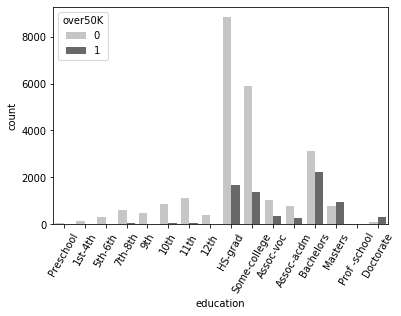

In [3]:
# Descriptive Plots
# here I am using DataFrame called "data" which defined as beginning
countplot=sns.countplot(x='education', data=data , hue='over50K', palette='Greys',
order=['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th','11th','12th','HS-grad',
'Some-college','Assoc-voc','Assoc-acdm','Bachelors','Masters','Prof -school','Doctorate'])
plt.xticks(rotation =60)



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

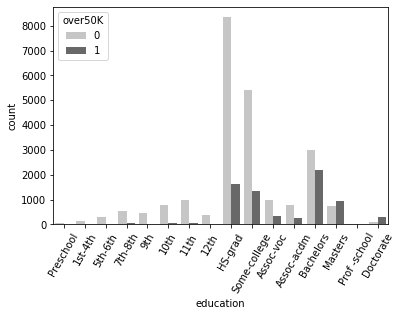

In [4]:
# Descriptive Plots
#here I am using DataFrame called "data_logit" which defined after future engineering

countplot=sns.countplot(x='education', data=data_logit , hue='over50K', palette='Greys',
order=['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th','11th','12th','HS-grad',
'Some-college','Assoc-voc','Assoc-acdm','Bachelors','Masters','Prof -school','Doctorate'])
plt.xticks(rotation =60)


# we've got the same Plot!

               over50K
education             
Preschool     0.000000
1st-4th       0.035714
5th-6th       0.048048
7th-8th       0.061920
9th           0.052529
10th          0.066452
11th          0.051064
12th          0.076212
HS-grad       0.159509
Some-college  0.190235
Assoc-voc     0.261216
Assoc-acdm    0.248360
Bachelors     0.414753
Masters       0.556587
Prof-school   0.734375
Doctorate     0.740920


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text xticklabel objects>)

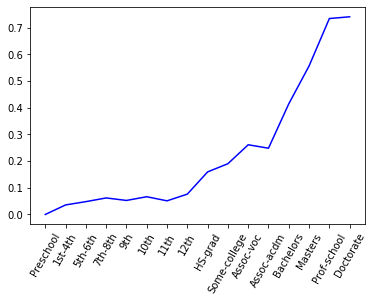

In [5]:
over50K_Ratio=data[['over50K','education']]. groupby('education').mean()
over50K_Ratio=over50K_Ratio.reindex(['Preschool', '1st-4th', '5th-6th', '7th-8th','9th',
'10th','11th','12th','HS-grad','Some-college','Assoc-voc','Assoc-acdm','Bachelors','Masters',
'Prof-school','Doctorate'])

print(over50K_Ratio)

plt.plot(over50K_Ratio ,color='blue')
plt.xticks(rotation =60)

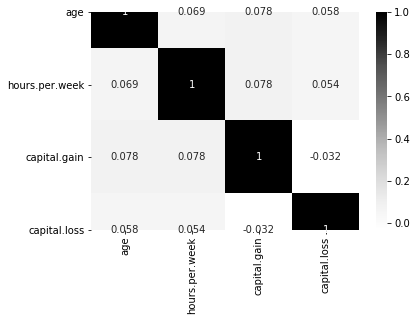

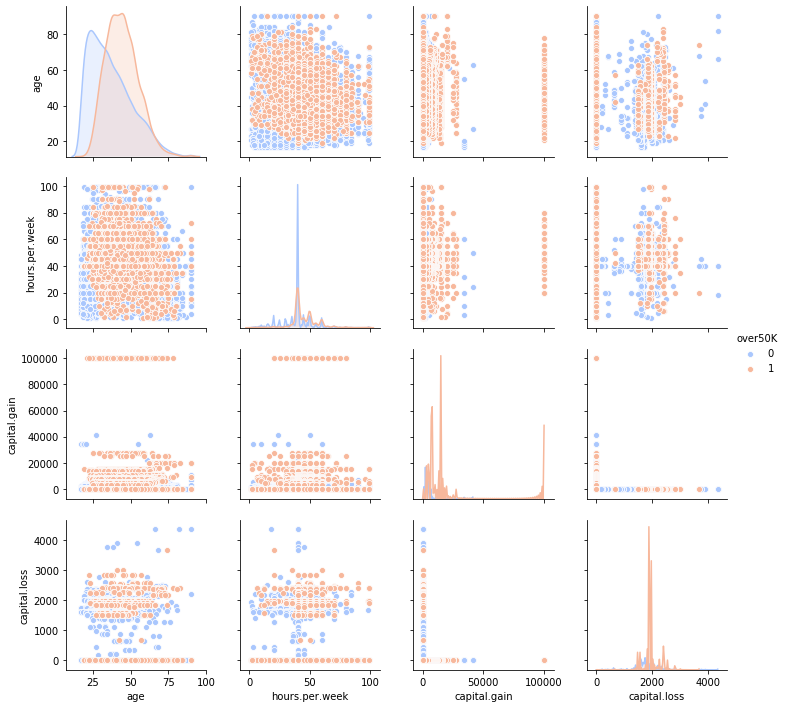

In [6]:
plt.ylabel('Percentage over 50K')
sns.heatmap(data[['age', 'hours.per.week', 'capital.gain', 'capital.loss']].corr(),
annot=True , cmap='Greys')
sns.pairplot(data=data ,
vars=['age', 'hours.per.week', 'capital.gain', 'capital.loss'],hue='over50K' ,  # data where 'over50K' will be plotted with another color
palette='coolwarm')

In [7]:
# Split in train and test dataset
data_logit=data[['over50K','age', 'hours.per.week','workclass_num', 'education.num', 'marital_num',
                'race_num', 'sex_num', 'rel_num', 'capital.gain', 'capital.loss']]
                
data_logit.dropna(inplace=True)

y=data_logit['over50K']
X = data_logit[['age', 'hours.per.week','workclass_num', 'education.num', 'marital_num',
                'race_num', 'sex_num', 'rel_num', 'capital.gain', 'capital.loss']]



X_dummies=pd.concat([pd.get_dummies(X['workclass_num'],drop_first=True ,prefix='workclass'),
                     pd.get_dummies(X['education.num'],drop_first=True ,prefix='education'),
                     pd.get_dummies(X['marital_num'],drop_first=True ,prefix='martial'),
                     pd.get_dummies(X['race_num'],drop_first=True ,prefix='race'),
                     pd.get_dummies(X['sex_num'],drop_first=True ,prefix='sex'),
                     pd.get_dummies(X['rel_num'],drop_first=True ,prefix='rel')],axis=1)

X_dummies.drop('education_2',inplace=True,axis=1)

#print(X_dummies.head())

X=pd.concat([X['capital.gain'],X['capital.loss'],X['age'],X['hours.per.week'],X_dummies],axis=1)
#print(X.head())

Names=['Capital.gain','Capital.loss','Age','Hours_per_Week','WC_StateGov','WC_FederalGov','WC_Self.emp.no.income',
      'WC_Self.emp.income','WC_LocalGov','WC_Without_pay', 'ED_7th-8th', 'ED_9th','ED_10th','ED_11th','ED_12th',
       'ED_HS-grad','ED_Some-college','ED_Assoc-voc','ED_Assoc-acdm','ED_Bachelors','ED_Masters','ED_Prof-school','ED_Doctorate','MS_Divorced',
       'MS_Separated','MS_Never_Married', 'MS_Married-civ-spouse','MS_Married-AF-spouse','MS_Married-spouse-absent',
       'R_Black','R_Asian-Pac-Islander','R_Amer-Indian-Eskimo','R_Other','Male','Relationship_Husband-Wife']             

X.columns=Names


X_train , X_test , y_train , y_test = train_test_split( X, y, test_size =0.3, random_state =245)


model_sm = sm.Logit(y_train ,sm.add_constant(X_train)).fit(maxiter =5000, method='bfgs') #Binary choice logit model
print(model_sm.summary ())

Optimization terminated successfully.
         Current function value: 0.339952
         Iterations: 362
         Function evaluations: 376
         Gradient evaluations: 366
                           Logit Regression Results                           
Dep. Variable:                over50K   No. Observations:                21502
Model:                          Logit   Df Residuals:                    21466
Method:                           MLE   Df Model:                           35
Date:                Wed, 05 Feb 2020   Pseudo R-squ.:                  0.3916
Time:                        14:36:55   Log-Likelihood:                -7309.7
converged:                       True   LL-Null:                       -12015.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const

Accuracy IS: 0.8426657985303693 


Confusion matrix IS:
 [[15094  1101]
 [ 2282  3025]] 



Classification report IS: 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90     16195
           1       0.73      0.57      0.64      5307

    accuracy                           0.84     21502
   macro avg       0.80      0.75      0.77     21502
weighted avg       0.84      0.84      0.84     21502

AUC score IS: 0.8946428994239639


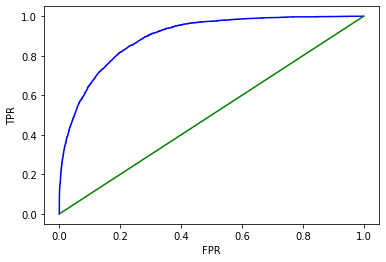

In [24]:
# In sample using predict function
y_score_IS = model_sm.predict(sm.add_constant(X_train)) #hier kriege ich die Wahrscheinlichkeit für jede Beobachtung,dass y=1 (mehr als 50K verdient)! English more technincal explaining: A results class for Logit Model using X_train data as input - note that we add constant 1 to our train matrix
                                                        # model_sm هو المتغير اللي حطيت فيه لوجيت موديل
                                                        # اعمل توقع بناء على مصفوفة اكس اللي اتدرب عليها النموذج اللي عندي بعد ما اضيف للعمود الاول واحد مشان تزبط عملية الضرب ببيتا صفر
                                                        # تذكر ان مخرج نموذج اللوجيت هو احتمال وليس الفئة وبالسطر اللي تحت احدد العتبة اللي اعطي فيها للمدخل الصنف تبعه
            
y_pred_IS = (y_score_IS > 0.5). astype(int)             # ab wann ich gebe y=1 (grundsätzlich wenn die Wahrscheinlihckeit über 50%, dann setze y=1) 
print('Accuracy IS:',np.mean( y_train == y_pred_IS),'\n\n')

#print(y_score_IS)
#print(y_pred_IS) #now we get the y prediction class 0 or 1!

## Confusion matrix
print('Confusion matrix IS:\n',confusion_matrix(y_train , y_pred_IS),'\n\n\n') # احط بالاسطر القيم الحقيقة ،الاعمدة القيم اللي توقعها النموذج

## Classifiacton report will calculate recall and precision!
print('Classification report IS: \n', classification_report(y_train ,y_pred_IS)) # هون يعملي الحسابات تبع البريسيشن ،الريكل
                                                                                 # precision = TP/Predicted positive نسبة الانذارات الصح من الانذارات اللي اطلقتها بالمجمل
                                                                                 # recall = TP/Actual positive نسبة الانذارات الصح من الغارات اللي اكلتها

### ROC Curve
fpr , tpr , thresholds = roc_curve(y_train , y_score_IS)
plt.plot(fpr , tpr , color = 'blue')
plt.plot([0, 1], [0, 1],color = 'green')
plt.xlabel('FPR')
plt.ylabel('TPR')
print('AUC score IS:',roc_auc_score(y_train , y_score_IS))

# ROC
#يعطيني لكل عتبة نسبة التوقع الصحيح وتسبة التوقع الخاطئ ،انا هدفي اعلى نسبة توقع صحيح ،بنفس الوقت اقل نسبة توقع خاطئ
#المهم اخذ النقاط الاعلى عاليسار 

Accuracy OOS: 0.8390842013888888 


Confusion matrix OOS:
 [[6394  479]
 [1004 1339]] 


Classification report IS:
               precision    recall  f1-score   support

           0       0.86      0.93      0.90      6873
           1       0.74      0.57      0.64      2343

    accuracy                           0.84      9216
   macro avg       0.80      0.75      0.77      9216
weighted avg       0.83      0.84      0.83      9216
 


AUC score OOS: 0.8993583917075104


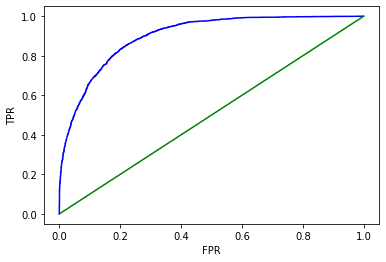

In [26]:
# Out of sample
y_score_OOS = model_sm.predict(sm.add_constant(X_test)) # نفس اللي فوق بس استعمل بيانات الاختبار 
y_pred_OOS = (y_score_OOS > 0.5). astype(int)
print('Accuracy OOS:',np.mean( y_test == y_pred_OOS),'\n\n')

## Confusion matrix
print('Confusion matrix OOS:\n',confusion_matrix(y_test , y_pred_OOS),'\n\n')

## Classifiacton report
print('Classification report IS:\n',classification_report(y_test ,y_pred_OOS),'\n\n')

### ROC Curve
fpr , tpr , thresholds = roc_curve(y_test , y_score_OOS)
plt.plot(fpr , tpr , color = 'blue')
plt.plot([0, 1], [0, 1],color = 'green')
plt.xlabel('FPR')
plt.ylabel('TPR')
print('AUC score OOS:',roc_auc_score(y_test , y_score_OOS ))

In [22]:
# jetzt schauen wir ob Regularizierung ein Vorteil hat!
# Bestrafungsterm kann ich in jeder Modell verwenden!

from sklearn.model_selection import GridSearchCV

### We use the sklearn implementation of the Logit regression to utilize penalties
grid = {'C': np.arange (0.01,0.3, step =0.01)} # C representiert verschiedene Werte von Lambda


Logit_Regular = GridSearchCV(estimator=LogisticRegression(solver='liblinear',penalty='l1',
max_iter =1000), param_grid=grid , scoring='roc_auc') # scoring nach was wird hier optimiert


Logit_Regular.fit(sm.add_constant(X_train) ,y_train)

print(Logit_Regular.best_params_)




{'C': 0.27}


In [31]:
#Logit_Regular.cv_results_

Best parameter: {'C': 0.27} 


Best score: 0.89236
AUC score IS 0.8930988989534405
AUC score OOS 0.8973475789860788


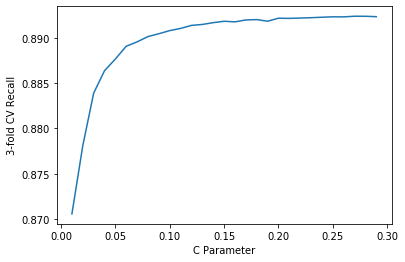

In [34]:
plt.figure()
plt.plot(list(grid.values ())[0],( Logit_Regular.cv_results_['mean_test_score']))
plt.xlabel('C Parameter')
plt.ylabel('3-fold CV Recall')
print('Best parameter: {}'.format(Logit_Regular.best_params_),'\n\n')
print('Best score: {:.5f}'.format((Logit_Regular.best_score_ )))


model_Logit_GS = LogisticRegression(C=Logit_Regular.best_params_['C']).fit(sm.add_constant(X_train) ,y_train)


pred_Logit_GS_IS = model_Logit_GS.predict_proba(sm.add_constant(X_train))[:,1]

print("AUC score IS", roc_auc_score(y_train , pred_Logit_GS_IS))

pred_Logit_GS_OOS = model_Logit_GS.predict_proba(sm.add_constant(X_test))[:,1]

print("AUC score OOS", roc_auc_score(y_test , pred_Logit_GS_OOS))

# طبعا نختار قيمة لامبدا اللي مسمينها سي هون اللي تحقق اعلى نسبة ريكل 

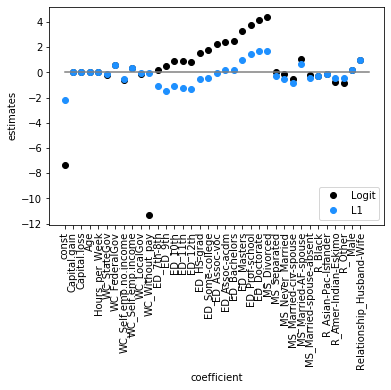

In [62]:
coef_L1 = pd.DataFrame(model_sm.params)
coef_L1['L1']=model_Logit_GS.coef_.reshape(36,1)
x=np.arange(0,36)
labels=coef_L1.index.values

plt.plot(x,coef_L1.iloc[:,0], 'bo',color = 'black')
plt.plot(x, coef_L1.iloc[:,1], 'bo',color = 'dodgerblue')

plt.plot([0,36],[0,0],color='gray')
plt.xticks(x, labels , rotation='vertical')
plt.xlabel('coefficient')
plt.ylabel('estimates')
plt.legend(('Logit', 'L1'),loc='lower right')

# تمثيل للمعاملات مع ريغولاريزيغونغ وبدونه دح تلقى كثير من المعاملات صارت قريبة حيل للصفر